# Regressie en correlatie

In [95]:
# Library om YouTube videos te importeren 

from IPython.display import YouTubeVideo, Image

## 1 Correlaties

### 1.1 Terugblik op correlaties

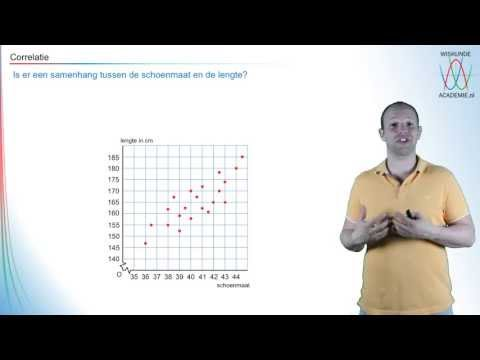

In [42]:
YouTubeVideo("FvZw74gz0Aw", width=800, height=500)

In de notebook van beschrijvende statistiek hebben we een blik geworpen op correlaties. Hoewel dit eigenlijk geen onderdeel is van beschrijvende statistiek, hoort dit ook binnen **'exploratory data analysis'** (het verkennen van de data), net als beschrijvende statistiek zelf. 

Met correlaties kijken we of er een **lineair** verband is tussen twee variabelen. Het is gebruikelijk om hier de Pearson correlatiecoëfficiënt voor te gebruiken. Deze coëfficiënt loopt van -1 tot +1. Een coëfficiënt met een waarde die dichtbij de +1 ligt, duidt op een sterke positieve correlatie. Vice versa, een coëfficiënt die dichtbij de -1 ligt, duidt op een sterke negatieve correlatie. Een coëfficiënt dichtbij de 0 duidt op een zwakke correlatie (of geen verband). 

Dit geldt overigens alleen voor lineaire verbanden. Het is namelijk best mogelijk dat twee variabelen een sterke relatie hebben, maar dat dit geen lineaire relatie is. Hierdoor kan de correlatie coëfficiënt dichtbij 0 zijn, terwijl het (non-lineaire) verband wel sterk is. 

**Waarschuwing!** Als twee variabelen een statistisch verband hebben, betekent het niet dat deze ook een **causaal** verband hebben. [Deze website](https://www.tylervigen.com/spurious-correlations) heeft een aantal grappige voorbeelden van sterke relaties, maar welke niet aan elkaar gerelateerd zijn. 

### 1.2 Bepalen van de Pearson correlatie coëfficiënt

De Pearson correlatie coëfficiënt tussen twee variabelen $x$ en $y$ wordt bepaald met de onderstaande formule.

Het sigma symbool($\Sigma$) geeft aan dat de som van alle waarden berekend moet worden

In [43]:
Image(url='https://cdn.wallstreetmojo.com/wp-content/uploads/2019/09/Pearson-Correlation-Coefficient-Formula.jpg.webp', width=600)

We gaan een voorbeeld bekijken. Hiervoor gebruiken we [California Housing Dataset](https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html). Om de code te runnen moet je de [Scikit-learn](https://scikit-learn.org/stable/) en de [Seaborn](https://seaborn.pydata.org/) libraries geïnstalleerd hebben.

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns

We beginnen met het importeren van de dataset als een pandas dataframe.

In [2]:
housing_df = datasets.fetch_california_housing(as_frame=True)
# housing_df

# MedHouseVal is as target_names so this is what target is.
# But how and why? 'target_names': ['MedHouseVal'] , is this because of fetch?
# or is the data pre-prepared with 'target_names':[], 'feature_names':[] en 'DESCR':..

# just checking...               

# housing_df.target           

# housing_df["MedHouseVal"]  # Doesn't work
# housing_df.MedHouseVal     # Doesn't work

# housing_df.target_names    
# housing_df.feature_names   
# print(housing_df.DESCR)  

# housing_df.frame.head()    # ["MedHouseVal"] column (target) shown only on frame
# housing_df.data.head()     # But not in df.data
# housing_df.frame.dtypes    # ["MedHouseVal"] is just float64 but hidden?

# housing_df
# type(housing_df)           # sklearn.utils.Bunch  that's new! 
# types(housing_df.data)
# type(housing_df.frame)     # so both df.data and df.frame just pandas DataFrame

# from sklearn.datasets import fetch_california_housing
# # So it is coming from sklearn datasets.

# let's try adding a new column to the data.

# housing_df.data["Test_target"] = housing_df.frame.MedHouseVal
# housing_df.data.head()     # it works!

# test = set(housing_df.frame.columns).symmetric_difference(housing_df.data.columns)
# test


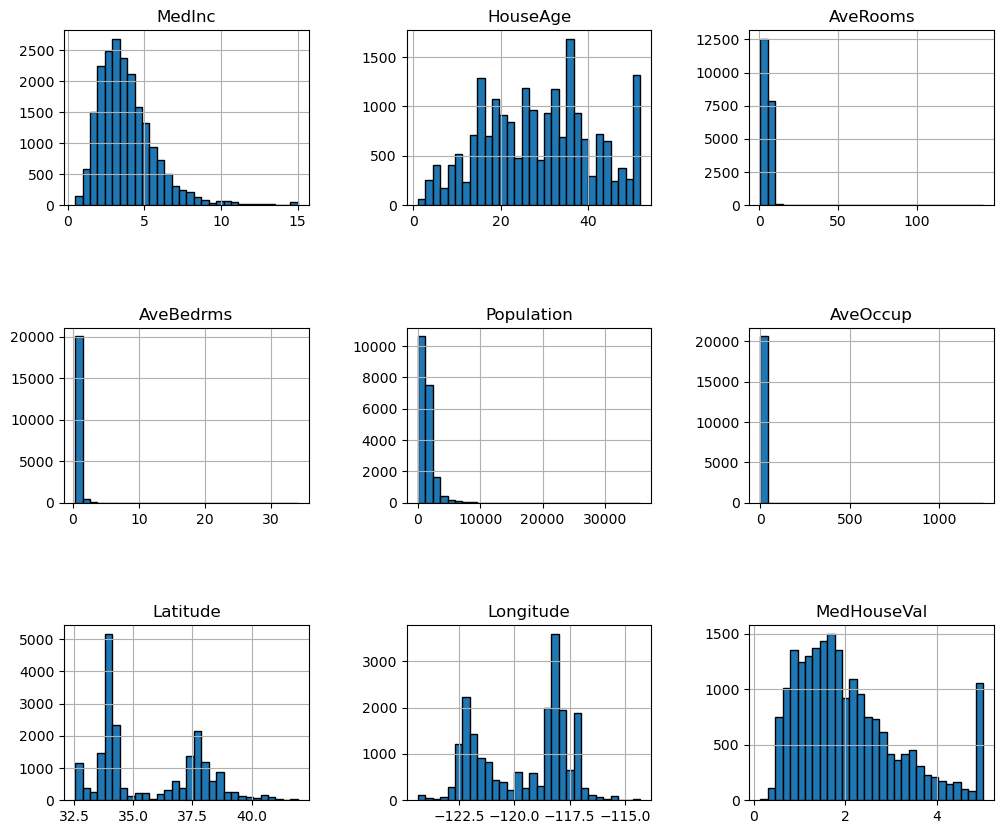

In [3]:
# let`s understand the data better with a quick histogram visualizations before continue

housing_df.frame.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

# Should check with different bins for room and bedroom info because the x numbers arent realistic
# But for now lets skip this part

In [4]:
housing_df.frame.dtypes

MedInc         float64
HouseAge       float64
AveRooms       float64
AveBedrms      float64
Population     float64
AveOccup       float64
Latitude       float64
Longitude      float64
MedHouseVal    float64
dtype: object

In tegenstelling tot het importeren van CSV-bestanden, zoals we tot nu toe hebben gedaan, geeft deze import ons twee objecten. Een dataframe genaamd "data" waarin verschillende kenmerken staan. Daarnaast is er ook een series genaamd "targets" waarin de mediane huizenprijzen worden gegeven, per honderdduizend dollar (\$100,000).

In [5]:
# omdat MedHouseVal column niet in 'feature_names': [] staat zien wij deze niet bij data maar bij target?

display(housing_df.data.head()) #hiermee selecteren we de specifieke dataset 'data'

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [6]:
display(housing_df.target.head()) #hiermee selecteren we de specifieke series 'target'

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

Ons doel is om te bepalen of er een verband is tussen de mediane inkomens (MedInc) en de mediane huizenprijzen (target). We beginnen met het maken van een nieuwe dataframe, waar we de kenmerken en de huizenprijzen combineren. Dit maakt het uitvoeren van een correlatie analyse gemakkelijker. 

In [7]:
combined_df = housing_df.data.copy()
combined_df["Prices"] = housing_df.target.copy()
display(combined_df.head())

# so the point of having 'target_names': ['MedHouseVal'] is being able to copy/use df.target without changing anything?

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Prices
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


We beginnen met een visualisatie van onze data, dit kan ons namelijk al veel vertellen. We doen dit met een scatterplot (puntenwolk grafiek).

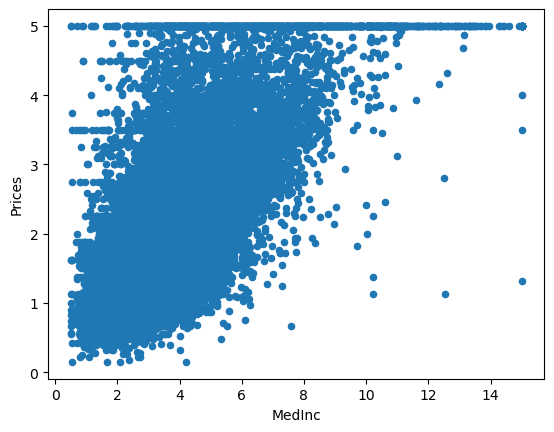

In [8]:
combined_df.plot.scatter('MedInc', 'Prices')
plt.show()

Er is een positieve correlatie te zien. Wanneer de mediane inkomens (x-as) omhoog gaat, stijgen de mediane huizenprijzen (y-as) ook.

We gaan nu de Pearson correlatie coëfficiënt bepalen. Om dit wat overzichtelijker te maken, creëren we een nieuw datafarame en hernoemen we onze variabelen naar $x$ en $y$. Zo kan je zien dat de code hetzelfde doet als de bovenstaande formule. 

In [9]:
# nieuw dataframe maken
calculation_df = pd.DataFrame()
calculation_df['x'] = combined_df["MedInc"].copy()
calculation_df['y'] = combined_df["Prices"].copy()
display(calculation_df.head())

# extra kolommen die $x**2$, $y**2$ en het product van $x$ en $y$ bevatten
calculation_df[r'$x^2$'] = np.square(calculation_df['x'])
calculation_df[r'$y^2$'] = np.square(calculation_df['y'])
calculation_df[r'$x * y$'] = calculation_df['x'] * calculation_df['y']
display(calculation_df.head())

# met behulp van de som ($\Sigma$) van de kolommen bepalen we de teller (numerator) en noemer (denominator) van de formule.
n = len(calculation_df)
numerator = n * sum(calculation_df[r'$x * y$']) - sum(calculation_df['x'])*sum(calculation_df['y'])
denominator = np.sqrt((n * sum(calculation_df[r'$x^2$']) - (sum(calculation_df['x']))**2) * (n * sum(calculation_df[r'$y^2$']) - (sum(calculation_df['y']))**2) )
corr_coeff = numerator/denominator
display(corr_coeff)

,x,y
0,8.3252,4.526
1,8.3014,3.585
2,7.2574,3.521
3,5.6431,3.413
4,3.8462,3.422


,x,y,$x^2$,$y^2$,$x * y$
0,8.3252,4.526,69.308955,20.484676,37.679855
1,8.3014,3.585,68.913242,12.852225,29.760519
2,7.2574,3.521,52.669855,12.397441,25.553305
3,5.6431,3.413,31.844578,11.648569,19.259900
4,3.8462,3.422,14.793254,11.710084,13.161696


0.6880752079584824

Dit geeft een gematigd-sterke positieve correlatie tussen de twee variabelen. 
Dit was erg veel wiskunde.. Gelukkig hoeven we deze stappen niet elke keer te herhalen, Numpy heeft hier een functie voor.

In [10]:
corr_coeff_np = np.corrcoef(calculation_df['x'], calculation_df['y'])
print(corr_coeff_np)

[[1.         0.68807521]
 [0.68807521 1.        ]]


Wanneer je de correlatie tussen meerdere variabelen wilt toetsen, kun je een kruistabel (matrix) maken met behulp van pandas:

In [11]:
display(combined_df.corr())

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Prices
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Prices,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


De bovenstaande matrix laat de correlatie coëfficiënt tussen alle numerieke kolommen zien. Uiteraard zijn sommige waardes hier niet waardevol voor ons (bijv. de relatie tussen Latitude/Longitude en de huizenprijzen).

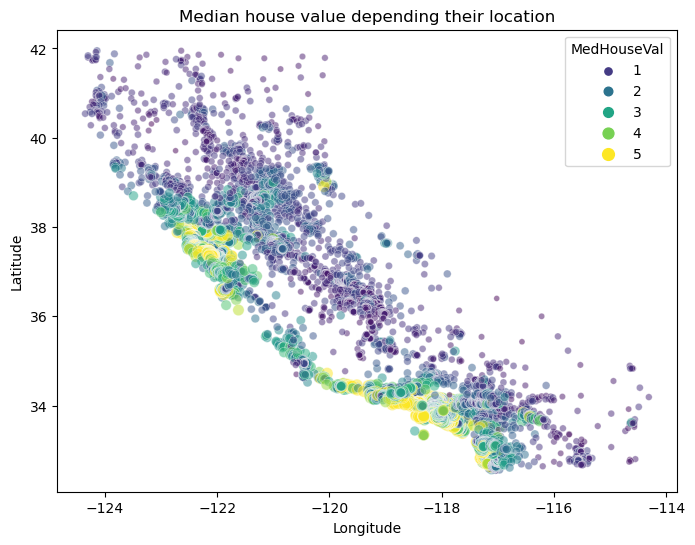

In [12]:
# Explanation between correlation between latitude, longitude and house prices
# Prices are higher if closer to the coast or in/around cities like Los Angeles and San Francisco.

import seaborn as sns

fig, ax = plt.subplots(figsize=(8,6))

sns.scatterplot(data=housing_df.frame, x="Longitude", y="Latitude",
                size="MedHouseVal", hue="MedHouseVal",
                palette="viridis", alpha=0.5)

plt.title("Median house value depending their location")
plt.show()

# Left side white space is the Pacific, right side is Nevada(no data). 
# Other empty places can be lakes, national parks or just missing data. 
# Interesting to understand the data better but it doesn't add much value for this specific course.

Een visueel aantrekkelijkere manier om dit te laten zien, is met behulp de Seaborn library. Hieronder zie je een heatmap van de correlatie coëfficiënten.

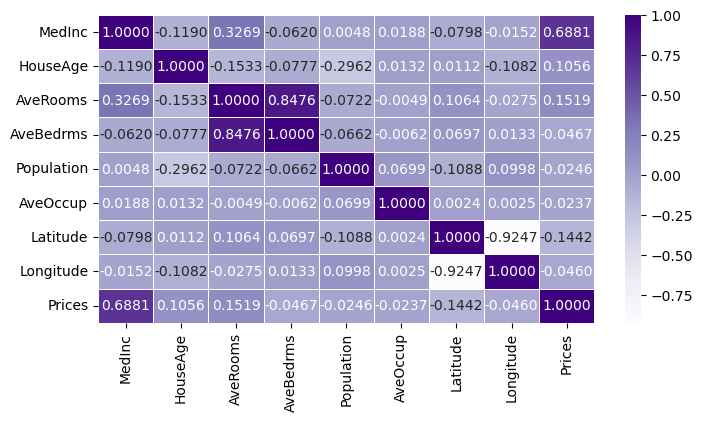

In [13]:
fig, ax = plt.subplots(figsize=(8,4))

sns.heatmap(combined_df.corr(), annot=True, cmap="Purples", fmt=".4f", linewidths=.6)
plt.show()

## 2 Regressie

In [14]:
YouTubeVideo("Ig4nx5bpNqw", width=800, height=500)

NameError: name 'YouTubeVideo' is not defined

### 2.1 Concept en definitie

Regressie is een statistische techniek die de relatie tussen variabelen modeleerd. Hierbij gaat het om de relatie tussen de **afhankelijke** variabele (target) en één of meerdere **onafhankelijke** variabelen (features). Wanneer we een wiskundig model hebben van deze relatie, kunnen we voorspellingen doen voor de target variabele op basis van de features. 

Stel we hebben een regressie model die de relatie tussen schoenmaat (target) en lichaamslengte (feature) beschrijft. We kunnen dit model dan gebruiken om de schoenmaat van een persoon te voorspellen op basis van hun lichaamslengte:

Hiervoor gebruiken we een dataset van "[Height and shoe size](https://osf.io/ja9dw/)". We beginnen met het laden beschrijven van de dataset

In [15]:
height_shoe_df = pd.read_csv('wo_men.csv')
display(height_shoe_df)

,time,sex,height,shoe_size
0,04.10.2016 17:58:51,woman,160.0,40.0
1,04.10.2016 17:58:59,woman,171.0,39.0
2,04.10.2016 18:00:15,woman,174.0,39.0
3,04.10.2016 18:01:17,woman,176.0,40.0
4,04.10.2016 18:01:22,man,195.0,46.0
...,...,...,...,...
96,17.10.2016 12:37:09,woman,170.0,39.0
97,17.10.2016 13:12:48,woman,183.0,39.0
98,19.10.2016 17:07:53,woman,173.0,40.0
99,29.10.2016 20:28:33,woman,160.0,37.0


In [16]:
display(height_shoe_df.describe())

,height,shoe_size
count,100.000000,100.00000
mean,165.233800,39.77500
std,39.817544,5.55613
min,1.630000,35.00000
25%,163.000000,38.00000
50%,168.500000,39.00000
75%,174.250000,40.00000
max,364.000000,88.00000


Hier vallen wat dingen op. Zoals de minimale/maximale lengte en maximale schoenmaat. Ook is de standaard deviatie van de lengte aan de hoge kant. We gaan de data visualiseren.

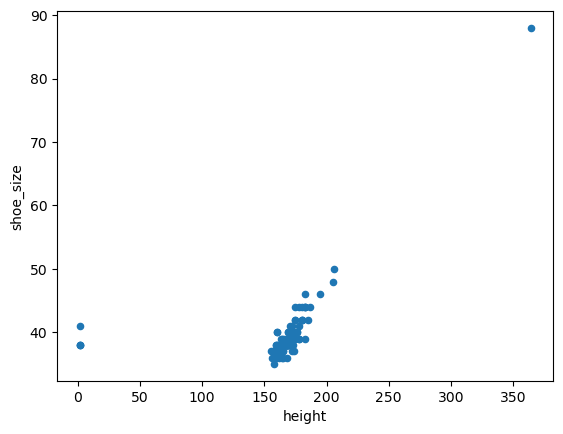

In [17]:
height_shoe_df.plot.scatter(x='height', y='shoe_size')
plt.show()

Doordat we een visualisatie hebben gemaakt, zien we direct waar de extreme waardes zitten in onze dataset. Een perfect voorbeeld van hoe je beschrijvende statistiek toepast. We gaan een aantal rijen verwijderen. We kiezen hiervoor de afkapwaarden van 100cm en 250cm. 

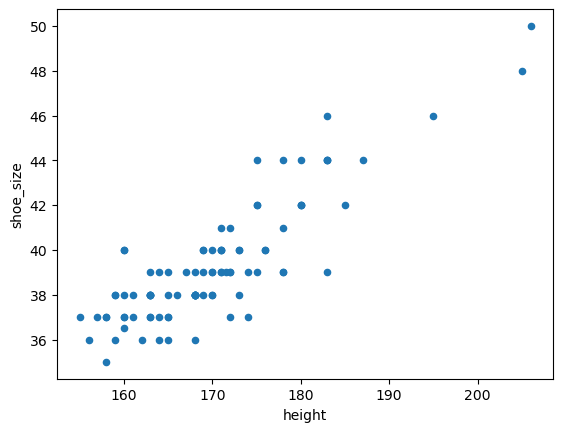

In [18]:
height_shoe_df_clean = height_shoe_df[(height_shoe_df['height'] > 100) & (height_shoe_df['height'] < 250)]
height_shoe_df_clean.plot.scatter(x='height', y='shoe_size')
plt.show()

Hier zien we een duidelijke relatie tussen onze twee variabelen. Op het oog zien we dat het gaat om een positieve correlatie, om te bepalen hoe sterk dit verband is, gaan we de Pearson correlatie coëfficiënt berekenen:

In [19]:
height_shoe_corr = np.corrcoef(height_shoe_df_clean['height'], height_shoe_df_clean['shoe_size'])[0,1]
print(height_shoe_corr)

0.8612402455211131


Een sterke positieve relatie! We gaan nu een regressiemodel maken op basis van deze data, zodat we voor een nieuw persoon waarvan we de lengte hebben gemeten, een voorspelling kunnen maken van de schoenmaat. Een lineair model ziet er als volgt uit:
$y = b_0 + b_1 x$

Waarbij 'x' de onafhankelijke variabele is (lichaamslengte) en 'y' de afhankelijke (schoenmaat). 
$b_0$  en $b_1$ worden de parameters van het model genoemd. Dit zijn de waarden die wij moeten bepalen om het meest nauwkeurige model te maken.

Probeer eens door het invullen van willkeurige getallen een lijn te plotten door de scatterplot heen. Middels trial and error kan je een redelijke schatting maken van de lijn. 

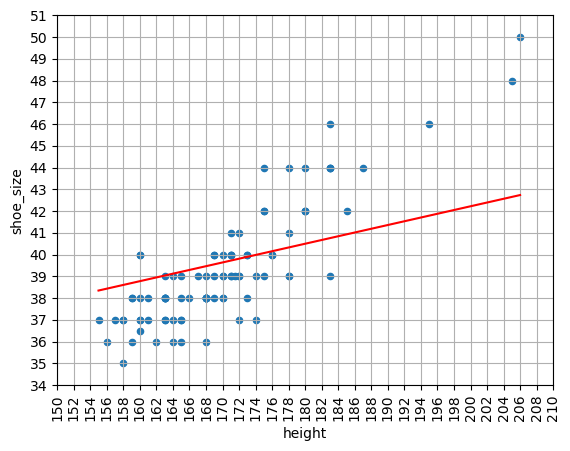

In [20]:
# Run deze cell met verschillende waarden voor b_0 en b_1 om te kijken of je een goede fit kan vinden voor onze scatterplot

# b_0: dit is de snijpunt die de lijn heeft met de y-as, dus waar de x-waarde 0 is.
b_0 = 25

# b_1: dit is de richtingscoëfficiënt van de lijn, dus hoe stijl de lijn loopt.
b_1 = 0.08612402455211137

# Deze code zorgt voor het plotje. Verander hier niks aan!
def trial_error_model(x):
    y = b_0 + b_1 * x
    return y

xrange = np.linspace(min(height_shoe_df_clean['height']), max(height_shoe_df_clean['height']), num=100)

yrange = [trial_error_model(h) for h in xrange]

height_shoe_df_clean.plot.scatter(x='height', y='shoe_size')
plt.plot(xrange, yrange, 'r-')

# adding extras for an educated guess
plt.xticks(list(range(150,211,2)), rotation=90)
plt.yticks(list(range(34,52,1)))
plt.grid()

plt.show()

In [21]:
height_shoe_df_clean.describe()

,height,shoe_size
count,95.000000,95.000000
mean,170.026316,39.310526
std,9.408679,2.727109
min,155.000000,35.000000
25%,163.000000,38.000000
50%,169.000000,39.000000
75%,174.500000,40.000000
max,206.000000,50.000000


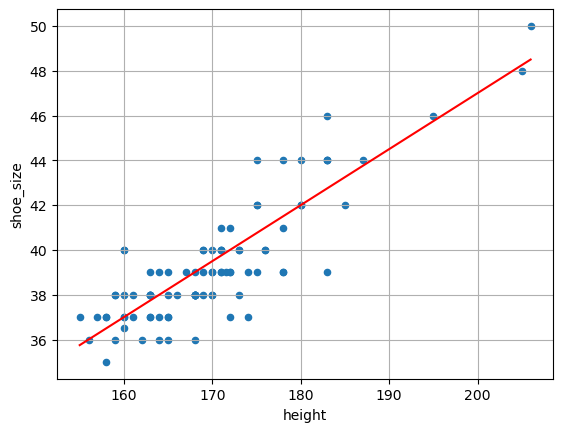

In [22]:
# Model 2 (2 chosen points) without b_0, b_1

# after adding extra grid options i checked around the median values for known exact values (168,39).
# then chose 2 different points from left and right of this points to make a line .
# I want all these 3 points to be on the same line.
# (180,42) , (160,37) and (168,39)

# I Check de y = b_0 + b_1 * x voor chosen points 
# (dont mix with X, y)
# k = a*l + b

# (180-160) / (42-37) = 4 = (slope)
# 180/42
# (180-12)/4 = 42
# 160/37
# (160-12)/4 = 37
# 168/39
# (168-12)/4 = 39

# x = 180, y = 42    180 = 42 * 4.286  or   180 = 12 + 42 * 4
# y = 160, y = 37    160 = 37 * 4.324  or   160 = 12 + 37 * 4

# We got our line    x = 4y + 12
# Can be written as  y = (x-12) / 4

# I chose these values to make calculations easier with our line [y = (x-12) / 4]
b_0 = -12
b_1 = 1

# Changing the function for b_0 and b_1 given values to match my prediction line.

def trial_error_model_2(x):
    y = (b_0 + b_1 * x) / 4       # y = (-12 + 1 * x) / 4
    return y

xrange = np.linspace(min(height_shoe_df_clean['height']), max(height_shoe_df_clean['height']), num=100)

yrange = [trial_error_model_2(h) for h in xrange]

height_shoe_df_clean.plot.scatter(x='height', y='shoe_size')
plt.grid()
plt.plot(xrange, yrange, 'r-')
plt.show()

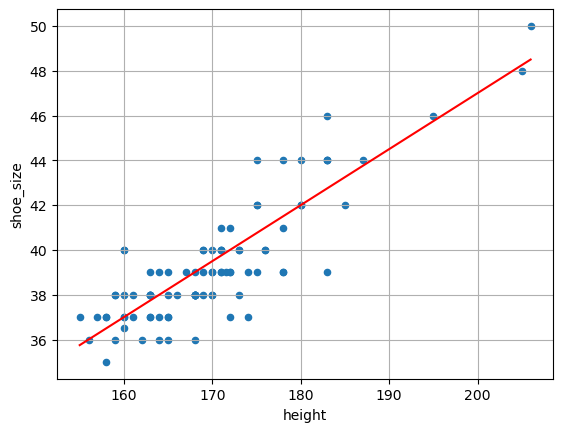

In [23]:
# Model 3  (Same 3 chosen points (180,42), (160,37), (168,39) 
# Leaving b_0, b_1 values out

# for those two points                    x = y * 4 + 12
# to be able to return y switching sides  y = (x-12) / 4

# could also just switch it in the function and use the first one.

def trial_error_model_3(x):
    y = (x-12) / 4
    return y

xrange = np.linspace(min(height_shoe_df_clean['height']), max(height_shoe_df_clean['height']), num=100)

yrange = [trial_error_model_3(h) for h in xrange]

height_shoe_df_clean.plot.scatter(x='height', y='shoe_size')
plt.grid()
plt.plot(xrange, yrange, 'r-')
plt.show()

In [24]:
print(f"Intercept for b_0 value = {reg.intercept_}")
print(f"Coefficient for b_1 value = {reg.coef_}")
# b_0: dit is de snijpunt die de lijn heeft met de y-as, dus waar de x-waarde 0 is.
b_0 = reg.intercept_

# b_1: dit is de richtingscoëfficiënt van de lijn, dus hoe stijl de lijn loopt.
b_1 = reg.coef_

# Deze code zorgt voor het plotje. Verander hier niks aan!
def trial_error_model(x):
    y = b_0 + b_1 * x
    return y

xrange = np.linspace(min(height_shoe_df_clean['height']), max(height_shoe_df_clean['height']), num=100)

yrange = [trial_error_model(h) for h in xrange]

height_shoe_df_clean.plot.scatter(x='height', y='shoe_size')
plt.plot(xrange, yrange, 'r-')

plt.show()

NameError: name 'reg' is not defined

### 2.2 RMSE and $R^2$

Er zijn verschillende manieren om op kwantitatieve wijze iets te zeggen over hoe goed ons model fit over de data. Twee hiervan gaan we behandelen, namelijk "Root Mean Squared Error" (RMSE) en de "verklaarde variantie" ($R^2$).

Als eerste de RMSE. We beginnen met de nauwkeurigheid, deze bepaal je door het verschil tussen de voorspelling van de target en de daadwerkelijke target waarde te berekenen. Dit doe je voor elke feature waarde (x-as). In de scatterplot zien we dat iemand met een lengte van circa 195cm een schoenmaat heeft van 46. Op basis van het model kan je achterhalen wat de voorspelde schoenmaat is voor iemand die 195cm lang is. Je berekend dus tussen deze twee waarden het verschil. Als je dit voor elke waarde doet krijg je een rij aan verschillen (errors). Je zal misschien geneigd zijn om het gemiddelde van deze errors te berekenen voor de totale nauwkeurigheid, maar dan zullen **de positieve en negatieve waarden elkaar opheffen**. We gaan daarom eerst alle errors kwadrateren (tot de macht twee), waarna we het gemiddelde van deze waarden berekenen, en daar vervolgens de wortel van. De waarde die je overhoud is de **Root Mean Squared Error (RMSE)**.

$RMSE = \sqrt{\frac{\sum_{i=1}^n(y - y_{pred})^2}{n}}$

Vervolgens kijken we naar de verklaarde variantie ($R^2$ ). Dit is een statistische maat die het aantal van de variantie voor een afhankelijke variabele (target) weergeeft dat wordt verklaard door de onafhankelijke variabele (feature). De formule is als volgt:

$R^2 = 1 - \frac{\sum_{i=1}^n(y - y_{pred})^2}{\sum_{i=1}^n(y - \bar{y})^2}$

Ook hier zien we dat er verschil wordt gemaakt door de voorspelde target waarde ($y_{pred}$) en de (gemiddelde) daadwerkelijke target waarde ($\bar{y}$). Deze waarde loopt van 0 tot 1 en als je deze waarden vermenigvuldigd met 100, is de verklaarde variantie te interpreteren als percentage: voor hoeveel procent verklaard lichaamslengte de schoenmaat. Een waarde in de buurt van 1 houdt in dat veel van de datapunten dichtbij de regressielijn zitten, en vice versa met een waarde dichtbij de 0. 

| <img src="https://slideplayer.com/slide/15055251/91/images/3/Explained+Variability+-+illustration.jpg" alt="$R^2$" width="600" height="600"/> |
| --- |
| <center>An illustration of high and low $R^2$. Source: https://slideplayer.com/slide/15055251/</center> |

Laten we de RMSE en $R^2$ waarden voor het model die je net, op basis van trial and error, hebt gemaakt gaan bepalen

In [25]:
# De daadwerkelijke waarden voor de target
y = height_shoe_df_clean['shoe_size']

# De voorspelde waarden voor de target
y_pred = trial_error_model(height_shoe_df_clean['height'])

# De RMSE
RMSE = np.sqrt(np.mean(np.square(y - y_pred)))

# De R2 waarde
R2 = 1 - (np.sum(np.square(y - y_pred))) / (np.sum(np.square(y - np.mean(y))))

print(f"Voor onze trial and error model hebben we een RMSE waarde van: {RMSE} en een R2 waarde van: {R2}")

Voor onze trial and error model hebben we een RMSE waarde van: 118.93131587070262 en een R2 waarde van: -1921.1323601376228


### 2.3 Lineaire regressie in Python:

Tot nu toe heb je trial en error gebruikt om een lineair model te maken op basis van de data. Echter, als data scientisten willen we een model creëren op basis van machine learning technieken. Een van de eenvoudige methoden om een lineair regressie model te maken is met de "Ordinary Least Squares" methode. Hier komen we in het volgende notebook (lineaire algebra) op terug. Voor nu gebruiken we de [scikit-learn](https://scikit-learn.org/stable/) library om een lineair model te maken en de resultaten te visualiseren.

Coëfficiënt b_0: 
 -3.1332750905267304

Coëfficiënt b_1: 
 0.24963077750193713

Root mean squared error: 1.38
Verklaarde variantie: 0.74


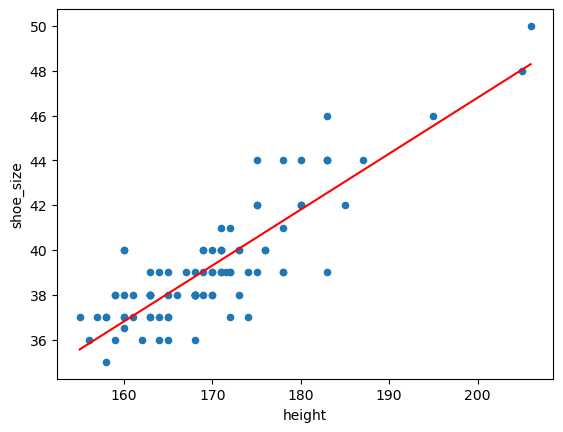

In [26]:
# Import de Linear Regression class van scikit-learn
from sklearn.linear_model import LinearRegression

X = height_shoe_df_clean['height'].values
y = height_shoe_df_clean['shoe_size'].values

# Sklearn verwacht een multidimensionale array voor X, dus vormen we onze 1D array om.
X = X.reshape(-1, 1)


# Import de RMSE en R2 functies
from sklearn.metrics import mean_squared_error, r2_score

# Gebruik de class om een model de fitten op onze data
reg = LinearRegression().fit(X, y)

# Print de coëfficiënten van ons lineair model 
print("Coëfficiënt b_0: \n", reg.intercept_)
print("\nCoëfficiënt b_1: \n", float(reg.coef_))

# Voorspel de target waarden (schoenmaat) met behulp van ons model
y_pred = reg.predict(X)

# De root mean squared error (RMSE)
print("\nRoot mean squared error: %.2f" % mean_squared_error(y, y_pred, squared=False))
# De verklaarde variantie
print("Verklaarde variantie: %.2f" % r2_score(y, y_pred))

# visualisatie van het model
y_model = reg.predict(xrange.reshape(-1,1))

height_shoe_df_clean.plot.scatter(x='height', y='shoe_size')
plt.plot(xrange, y_model, 'r-')
plt.show()

Hoe nauwkeurig was jouw model ten opzichte van het model op basis van machine learning?

In [27]:
# Antwoord = Niet zo nauwkeurig met model1
# Met aangepast model2 en model3 voor twee zelf gekozen punten kwam ik wel in de buurt.

### 2.4 Meervoudige lineaire regressie

Tot nu toe hebben we lineaire regressies gezien met 1 feature (x) en 1 target (y). We kunnen ook een model maken waarbij de target variabele een lineair verband heeft met meerdere features en dus afhankelijk is van deze features. De formule voor zo'n model is vergelijkbaar met die we hiervoor hebben gezien:

$y = b_0 + b_1 x_1 + b_2 x_2 + b_3 x_3 + \cdots$ 

Wanneer we een lineair model toepassen op multivariate data, moeten we dus de waarden voor de volgende coëfficiënten bepalen: $b_0$, $b_1$, $b_2$ etc.

We gaan dit toepassen bij de California Housing Dataset.

In [28]:
display(housing_df.data.head())

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


We gaan een lineaire regressie toepassen met de features hierboven, om zo de huizenprijzen (target) te voorspellen. Dit doen we door gebruik te maken van sci-kit learn linear regression functie. Voordat we de functie uitvoeren zijn er een aantal zaken waar we rekening mee moeten houden. Dit zijn tevens vragen die jij jezelf **moet** stellen wanneer je een machine learning model aan het trainen bent.

**1. Kan ik alle features van mijn dataset gebruiken?**

Voordat we een model trainen, moeten we de features vaak nog bewerken (preprocessing). Hier ga je meer over leren bij de machine learning en deep learning modules. Aangezien we nu een lineaire regressie toepassen, vraag jezelf af of elke feature hiervoor geschikt is: op basis van het datatype en of het relevant is om een lineair verband te trekken tussen de features en de huizenprijzen.

Je ziet bijvoorbeeld dat twee features latitude en longitude zijn. We kunnen hier geen lineair verband met huizenprijzen op afleiden. Een latitude van 20 graden is niet 2 keer zo belangrijk als een latitude van 10 graden, of een longitude van 5 graden draagt niet twee keer zo weinig bij voor de prijs van een huis ten opzichte van een longitude van 10 graden.  Aangezien lineaire verbanden hier betekenisloos zijn, verwijderen we deze kolommen van onze dataset.

In latere modules gaan we ook naar technieken kijken om deze features toch in ons model op te nemen, maar voor nu verwijderen we ze. 

In [29]:
# Hhousing dataset features en targets
X = housing_df.data.drop(columns=['Latitude', 'Longitude'])
y = housing_df.target

**2. Ben ik mijn model aan het trainen en testen op verschillende data?**

Dit is een belangrijke vraag. Als jij je model op specifieke data traint, dan bestaat de kans dat je model 'overfit.' Het is daarom gebruikelijk om een **training set** en een **test set** te maken. De data (rijen) die je gebruikt om je model te trainen is ongeveer 70\% tot 80\%. De overige data kun je gebruiken om je model te testen. Je data opsplitsen kan met behulp van de [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) method.

In [30]:
from sklearn.model_selection import train_test_split

# Gebruik 80% van je data als training data en 20% als test data
# Gebruik random_state randomiseren om reproduceerbaarheid te garanderen
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# waarom test_size = 0.33 en geen test_size = 0.20 als 20% test data is? 
# en als het .33 van 1.33 is dan is het ~25% test size en nog geen 20%

In [31]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(13828, 6) (13828,) (6812, 6) (6812,)


In [32]:
6812 / (13828 + 6812)

0.33003875968992247

We hebben nu onze test en training dataset voor de features en target. We kunnen nu het model maken.

In [33]:
# Maak een model op basis van de training set
house_reg = LinearRegression().fit(X_train, y_train)

# Achterhaal de coëffciënten van ons model
print("Coëfficiënten: \n", house_reg.coef_)
print("\nConstante(b_0): \n", house_reg.intercept_)

# We gaan nu voorspellingen doen voor de huizenprijzen, we gebruiken hier dus onze test data voor
y_pred = house_reg.predict(X_test)

# We kunnen nu de nauwkeurigheid van ons model toetsen
# Root mean squared error
print("\nRoot mean squared error: %.2f" % mean_squared_error(y_test, y_pred, squared=False))
# Verklaarde variantie
print("Verklaarde variantie: %.2f" % r2_score(y_test, y_pred))

Coëfficiënten: 
 [ 5.40711717e-01  1.67154846e-02 -2.19428299e-01  1.10229965e+00
  2.57856950e-05 -4.38764024e-03]

Constante(b_0): 
 -0.5469981052548527

Root mean squared error: 0.79
Verklaarde variantie: 0.53


In [34]:
# .predict() coming from sklearn? datasets? using as a model but from where? help function doesnt work.
156/39

4.0

We gaan nu de voorspelde prijzen en de daadwerkelijke prijzen bekijken:

,True Price,Predicted Price
20046,0.47700,1.005790
3024,0.45800,1.561570
15663,5.00001,2.666241
20484,2.18600,2.640496
9814,2.78000,1.979880


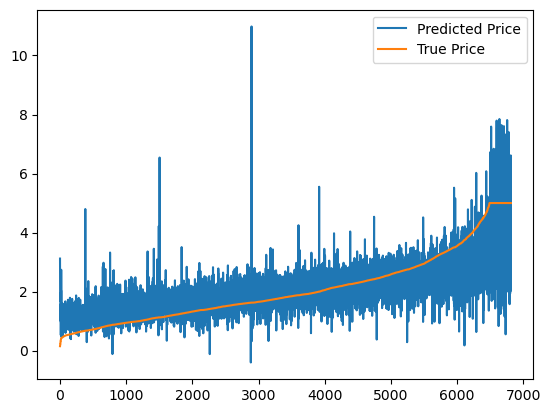

In [35]:
# creating new data frame
results_df = pd.DataFrame()

# adding new columns with the variables from cell before
results_df['True Price'] = y_test
results_df['Predicted Price'] = y_pred

# result
display(results_df.head())

# visual result
results_df = results_df.sort_values(by = 'True Price').reset_index(drop=True)
results_df.plot(kind = 'line', y = ['Predicted Price','True Price'])
plt.show()

Middels deze visualisatie zien we dat de voorspelde huizenprijzen ook een positieve stijging hebben, net als de daadwerkelijke waarden, maar we zien wel dat er veel random uitschieters zijn. Zou jij dit model gebruiken om huizenprijzen te voorspellen?

In [36]:
# Voor een indicatie en algemeen begrip wel,
# maar zeker niet voor het automatiseren van een website van een makelaar bijv. 

## 3 Opdrachten

Je gaat nu toepassen wat je hebt geleerd. De dataset die we gebruiken bevat variabelen over fysieke karakteristieken van proefpersonen die een bepaalde oefening doen, dit zijn de features. Onze target data bevat het aantal calorieën die ze verband hebben. 

Het is aan jou om een lineair regressie model te maken op de dataset om de verbrande calorieën te voorspellen, op basis van de fysieke karakteristieken.

In [37]:
exercise_data = pd.read_csv( 'exercise.csv' )
calories_data = pd.read_csv( 'calories.csv' )
joined_data = exercise_data.join( calories_data.set_index( 'User_ID' ), on='User_ID', how='left')

X = joined_data.drop(columns=['User_ID', 'Calories'])
y = joined_data['Calories']

In [38]:
joined_data

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3,11.0


### Vraag 1: Kan je alle variabelen van de features direct gebruiken voor een lineair regressie model? Waarom wel/niet? Is er een manier om ze allemaal bruikbaar te maken? Zo ja, bewerk deze variabele(n) dan zodat je ze kan gebruiken in je model.

In [39]:
## Your code here
exercise_data.head()
exercise_data.dtypes

# X is our dataframe, y is target (calories)

User_ID         int64
Gender         object
Age             int64
Height        float64
Weight        float64
Duration      float64
Heart_Rate    float64
Body_Temp     float64
dtype: object

I dont think i ll be using User_ID and gender as features for sure.
Not sure abot the age, height and weight. They might have an effect and some correlations

`User_ID as number
Gender as boolean
Age in years
Height in cm
Weight in kg
Duration in minutes?
Heart_Rate per minute
Body_Temp in celcius`

Because while age, height, weight maybe correlated, they are depending on the participant amount and data size and not really changing with the test results.

#### Example
Even with good results we can not say someone burnt this much calories after this much minute training with this much heartrate while training with body temperature of this. And he/she was 70kg.. or 170cm or 55 years old. Doesnt add value to calculations of a test in my opinion.

Because otherwise it ll mess up the model with extra randomness to the story by the size of the group.
I ll work with only the training results in this modelling exercise.

It maybe expected someone heavier burning more calories but will this info really help the model?
I dont think so. 

To make sure I ll add BMI as a feature to reduce the randomnesss of Height/Weight while still using them so adding BMI as float and making Age, Height and Weight caterogical columns. 


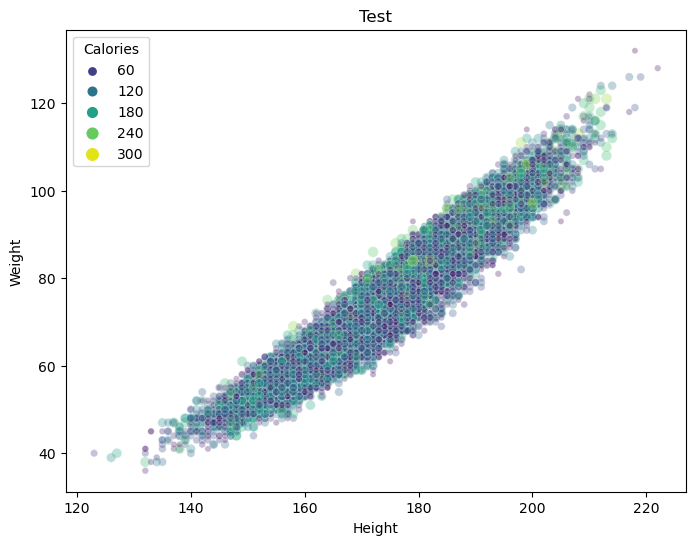

In [40]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(8,6))

sns.scatterplot(data=joined_data, x="Height", y="Weight",
                size="Calories", hue="Calories",
                palette="viridis", alpha=0.3)

plt.title("Test")

plt.show()

In [41]:
# There is an obvious correlation between height and weight but calories burnt is too spread
X["BMI"] = (exercise_data.Weight / (exercise_data.Height / 100) ** 2).round(decimals=1)
# BMI = kg/m2 , dividing by 100 to change from cm to meter
# and setting 1 decimal like rest of features to stay consistent

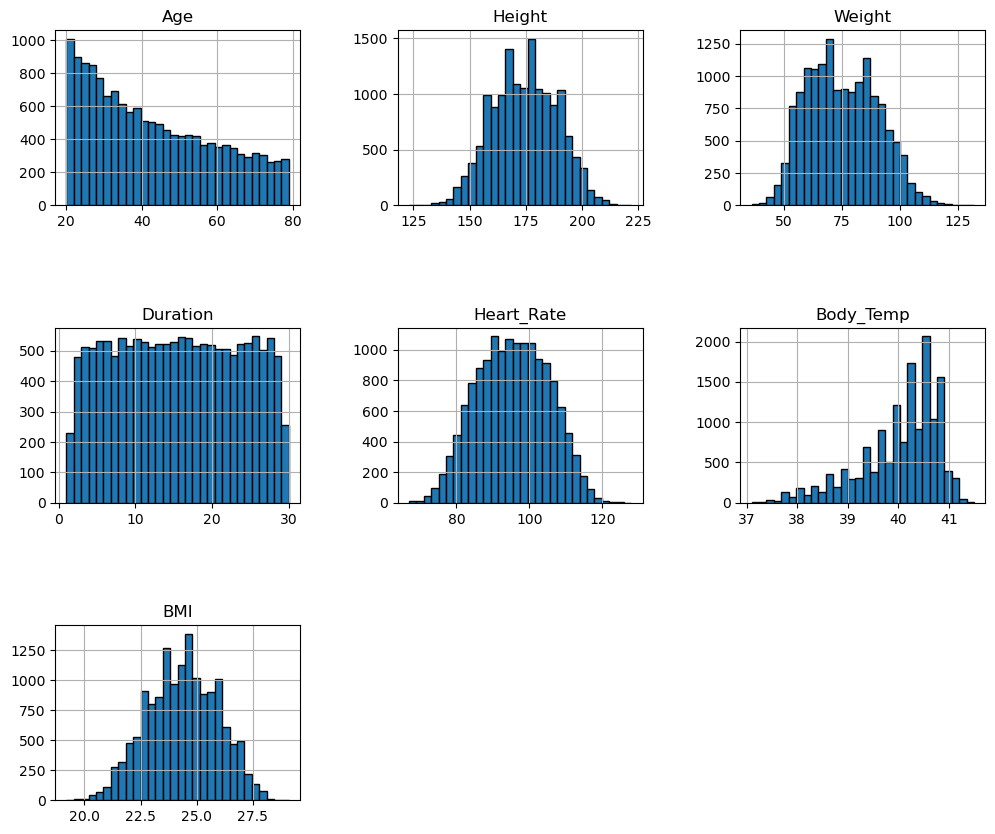

In [42]:
X.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

In [43]:
# Changing chosen columns to categorical types
X[["Gender","Age","Height","Weight"]] = X[["Gender","Age","Height","Weight"]].astype("category")
X.dtypes
X

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,BMI
0,male,68,190.0,94.0,29.0,105.0,40.8,26.0
1,female,20,166.0,60.0,14.0,94.0,40.3,21.8
2,male,69,179.0,79.0,5.0,88.0,38.7,24.7
3,female,34,179.0,71.0,13.0,100.0,40.5,22.2
4,female,27,154.0,58.0,10.0,81.0,39.8,24.5
...,...,...,...,...,...,...,...,...
14995,female,20,193.0,86.0,11.0,92.0,40.4,23.1
14996,female,27,165.0,65.0,6.0,85.0,39.2,23.9
14997,female,43,159.0,58.0,16.0,90.0,40.1,22.9
14998,male,78,193.0,97.0,2.0,84.0,38.3,26.0


In [44]:
X.describe()

,Duration,Heart_Rate,Body_Temp,BMI
count,15000.000000,15000.000000,15000.000000,15000.000000
mean,15.530600,95.518533,40.025453,24.344433
std,8.319203,9.583328,0.779230,1.560909
min,1.000000,67.000000,37.100000,19.200000
25%,8.000000,88.000000,39.600000,23.200000
50%,16.000000,96.000000,40.200000,24.400000
75%,23.000000,103.000000,40.600000,25.500000
max,30.000000,128.000000,41.500000,29.100000


### Vraag 2: 'Split' de data in een training- en test set

In [45]:
## Typ hier je code
from sklearn.model_selection import train_test_split

# Gebruik 80% van je data als training data en 20% als test data (i ll use this one this time)
# Gebruik random_state randomiseren om reproduceerbaarheid te garanderen
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(12000, 8) (12000,) (3000, 8) (3000,)


### Vraag 3: Vanaf hier gebruiken we alleen de trainingset, tenzij anders wordt vermeld. Maak 3 á 4 visualisaties van jouw data om inzicht te krijgen in het verband tussen de features en de target.

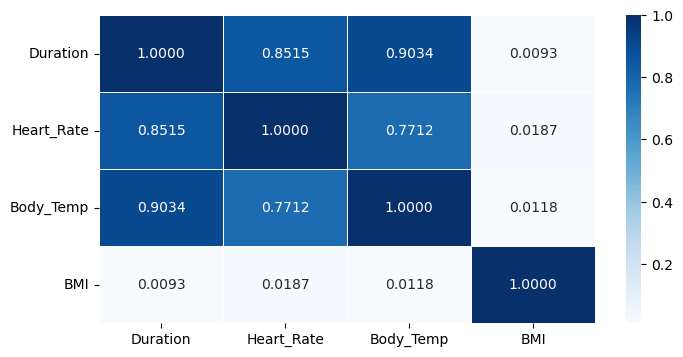

In [46]:
## Typ hier je code
fig, ax = plt.subplots(figsize=(8,4))

sns.heatmap(X_train.corr(), annot=True, cmap="Blues", fmt=".4f", linewidths=.6)
plt.show()

In [47]:
# Dropping BMI 
del X["BMI"]

In [48]:
# Rerunning split to continue without BMI column, can add later if needed
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(12000, 7) (12000,) (3000, 7) (3000,)


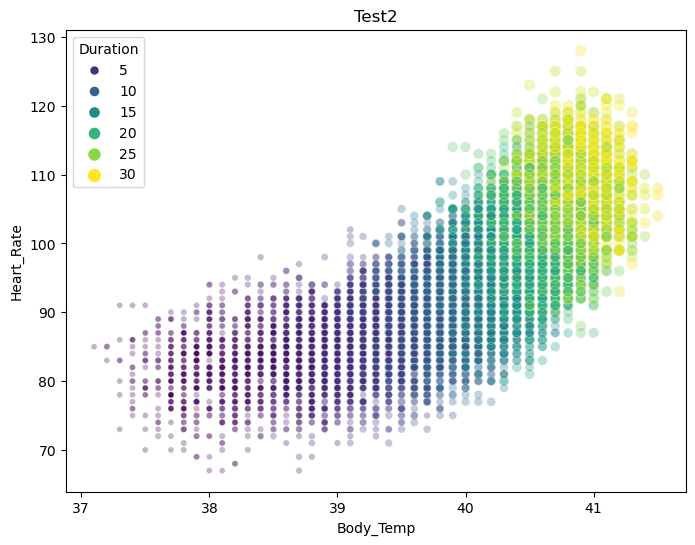

In [49]:
# a scatter plot to understand the correlation between futures better

import seaborn as sns

fig, ax = plt.subplots(figsize=(8,6))

sns.scatterplot(data=X, x="Body_Temp", y="Heart_Rate",
                size="Duration", hue="Duration",
                palette="viridis", alpha=0.3)

plt.title("Test2")

plt.show()

### Vraag 4: Bepaal de correlatiematrix van de features. Welke van deze hebben de sterkste relatie? Is dit iets wat je verwacht?

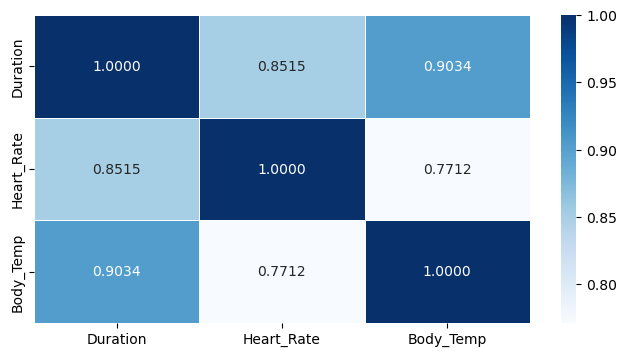

In [50]:
fig, ax = plt.subplots(figsize=(8,4))

sns.heatmap(X_train.corr(), annot=True, cmap="Blues", fmt=".4f", linewidths=.6)
plt.show()

# Ja dat had ik verwacht

### Vraag 5: Bepaal de Pearson correlatie coëfficiënt tussen de volgende variabelen:

### a) Duur en calorieën
### b) Hartslag en calorieën
### c) Lichaamstemperatuur en calorieën

In [51]:
print(f"a) Duur en calorieën \n {np.corrcoef(X.Duration, y)}\n")
print(f"b) Hartslag en calorieën \n {np.corrcoef(X.Heart_Rate, y)}\n")
print(f"c) Lichaamstemperatuur en calorieën \n {np.corrcoef(X.Body_Temp, y)}\n")

a) Duur en calorieën 
 [[1.         0.95542053]
 [0.95542053 1.        ]]

b) Hartslag en calorieën 
 [[1.         0.89788206]
 [0.89788206 1.        ]]

c) Lichaamstemperatuur en calorieën 
 [[1.         0.82455776]
 [0.82455776 1.        ]]



In [115]:
X.corr()
joined_data.corr()
X.shape
joined_data


,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3,11.0


In [144]:

def my_corr(df, target="Calories"):
    cor = []
    for i in list(df.columns):
        cor.append(round(np.corrcoef(df[i], df[target])[0][1],2))
    return cor

my_corr(joined_data)


TypeError: unsupported operand type(s) for /: 'str' and 'int'

### Vraag 6: Maak een model met de dataset om de calorieën te voorspellen.

In [99]:
# cant use category values so dropping them to be able to make a model
# getting error otherwise..

X_train = X_train[["Duration", "Heart_Rate", "Body_Temp"]]
X_test  = X_test[["Duration", "Heart_Rate", "Body_Temp"]]

In [100]:
cal_reg = LinearRegression().fit(X_train, y_train)

### Vraag 7: Wat zijn de coëfficiënten uit jouw model? Welke variabele heeft de meeste/minste impact op het verbanden van calorieën?

In [101]:
print("Coëfficiënten: \n", cal_reg.coef_)
print("\nConstante(b_0): \n", cal_reg.intercept_)

Coëfficiënten: 
 [  6.61720894   2.00229419 -16.8123427 ]

Constante(b_0): 
 468.32767066347594


### Vraag 8: Gebruik nu je model om een voorspelling te doen van de calorieën van jouw test dataset.

In [105]:
y_pred = cal_reg.predict(X_test)
y_pred

array([172.03946825, 201.5815061 ,  48.82973852, ..., 133.05426912,
        14.56718228, 199.82433718])

### Vraag 9: Wat is de root mean squared error van jouw model? 

In [106]:
print("\nRoot mean squared error: %.2f" % mean_squared_error(y_test, y_pred, squared=False))


Root mean squared error: 14.70


### Vraag 10: Wat is de verklaarde variantie? 

In [107]:
print("Verklaarde variantie: %.2f" % r2_score(y_test, y_pred))

Verklaarde variantie: 0.95


### Vraag 11: Op basis van jouw exploratory data anlysis, visualisaties en eigen inzicht: Wat zou je kunnen doen om jouw voorspelling te verbeteren met deze dataset?

,Calories,Predicted Calories
11499,173.0,172.039468
6475,189.0,201.581506
13167,53.0,48.829739
862,161.0,157.444876
5970,226.0,201.505571


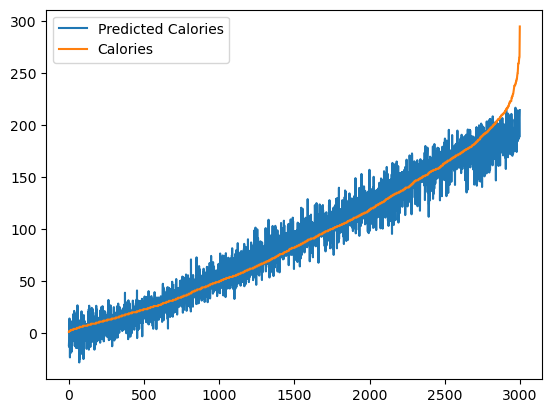

      Calories  Predicted Calories
2980     245.0          202.512892
2981     247.0          201.794838
2982     248.0          191.891095
2983     249.0          186.526332
2984     250.0          214.237391
2985     250.0          185.626740
2986     252.0          184.695353
2987     255.0          198.111309
2988     259.0          191.783367
2989     259.0          191.922889
2990     259.0          186.558126
2991     260.0          192.243948
2992     260.0          202.576479
2993     261.0          210.232803
2994     264.0          202.865746
2995     265.0          199.150424
2996     265.0          188.592214
2997     266.0          196.537803
2998     287.0          203.186806
2999     295.0          214.558451


In [108]:
# creating new data frame
result = pd.DataFrame()

# adding new columns with the variables from cell before
result['Calories'] = y_test
result['Predicted Calories'] = y_pred

# result
display(result.head())

# visual result
result = result.sort_values(by = 'Calories').reset_index(drop=True)

result.plot(kind = 'line', y = ['Predicted Calories','Calories'])
plt.show()
print(result.tail(20))

In [431]:
exercise_data.columns

Index(['User_ID', 'Gender', 'Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp'],
      dtype='object')

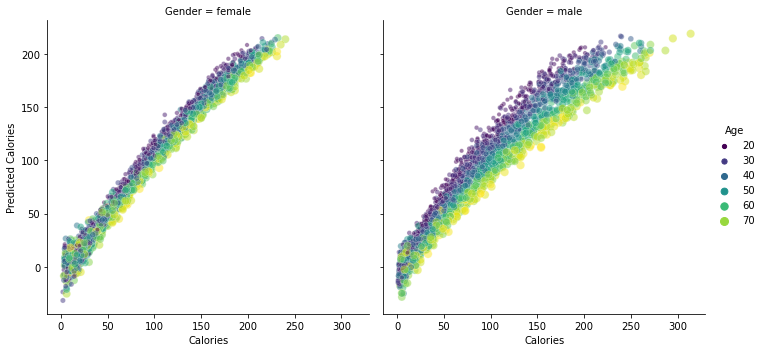

In [464]:
# just checking gender difference of our prediction with different ages
test8 = pd.DataFrame()

# adding new columns with the variables from cell before
test8['Calories'] = y_test
test8['Predicted Calories'] = y_pred
test8['Gender'] = exercise_data.Gender
test8['Age'] = exercise_data.Age

test8.head()

fig, ax = plt.subplots(figsize=(8,6))

sns.relplot(kind="scatter",data=test8, x="Calories", y="Predicted Calories",
                size="Age", hue="Age", col="Gender",
                palette="viridis", alpha=0.5)

plt.close(1)
plt.show()

# female predictions with this model look more accurate than male predictions.
# should make age groups split the data and make another model for better prediction maybe

In [446]:
test8.Gender.value_counts()

male      2483
female    2467
Name: Gender, dtype: int64

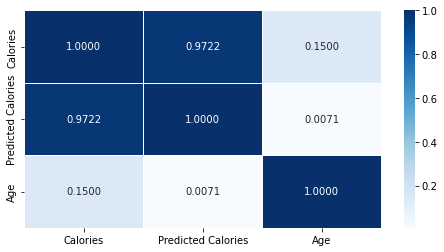

In [448]:
fig, ax = plt.subplots(figsize=(8,4))

sns.heatmap(test8.corr(), annot=True, cmap="Blues", fmt=".4f", linewidths=.6)
plt.show()
